# Data Scientist Professional Practical Exam

### Company Background

Tasty Bytes , an online recipe startup, has hired you as a data scientist. The website features new recipes on the homepage every day. The owner has told you that on days that they feature a popular recipe, traffic increases by as much as 40%. However, it is difficult to predict in advance which recipes will be popular.

Recipes are considered to be popular if they receive a high score. The data team has collected data from previously published recipes.



### Customer Question

The owner wants to know:
- Can you use information on previously published recipes to predict whether a recipe will receive a high score?




### Success Criteria

The owner estimates that of all low scoring recipes, they currently correctly categorize 75% of them. They want to know how your approach compares to this.


### Dataset

The data you will use for this analysis can be accessed here: `"data/recipes.csv"`

## Start of Data Validation

In [65]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!
# Data Validation
import pandas as pd

recipes_df = pd.read_csv('data/recipes.csv')
# Have a look at how the data is structured
recipes_df.head(10)

,RecipeId,Name,RecipeCategory,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
0,46085,Crock Pot Baked Potato Soup,One Dish Meal,699.8,137.3,46.1,1.4,20.9,6.0,1.0
1,93832,Frittata Di Spaghetti (spaghetti Frittata),Breakfast,297.1,191.8,11.7,0.7,12.2,8.0,1.0
2,36034,Berries With Italian Cream,Dessert,131.9,23.3,10.3,4.4,9.1,6.0,0.0
3,329988,Pork Tenderloin Medallions With Fresh Figs,< 15 Mins,203.0,74.8,1.5,0.6,23.3,4.0,1.0
4,59886,Kaseropita (Tiropita Using Kaseri Cheese),Savory Pies,261.6,103.6,20.9,0.2,6.7,15.0,1.0
5,328806,My Kids Breakfast Smoothie,Smoothies,313.4,42.7,42.1,17.0,11.7,2.0,1.0
6,375975,Moroccan Meatballs in Tomato Sauce,Lamb/Sheep,566.0,103.7,10.1,5.0,25.6,4.0,0.0
7,189787,Eggplant (Aubergine) and Tomato Crisp,Vegetable,151.5,5.5,15.1,6.4,5.1,8.0,1.0
8,424798,Very Berry Iced Tea,Beverages,4.0,0.0,0.9,0.3,0.1,8.0,1.0
9,17549,Burnished Bananas,Dessert,120.9,0.0,29.8,17.3,1.3,1.0,0.0


In [66]:
recipes_df.describe()

,RecipeId,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
count,43092.000000,43092.000000,43092.000000,43092.000000,43092.000000,43092.000000,43092.000000,43092.000000
mean,224707.928154,353.297587,69.475757,32.844187,12.206600,15.773125,9.517521,0.645735
std,141980.914350,405.065683,112.422309,46.428258,28.304371,21.588594,224.022873,0.478296
min,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,102616.750000,164.800000,4.500000,11.600000,2.200000,3.400000,4.000000,0.000000
50%,212333.000000,284.100000,40.700000,25.400000,5.500000,8.800000,6.000000,1.000000
75%,336736.250000,446.725000,95.900000,43.400000,14.100000,24.300000,8.000000,1.000000
max,540876.000000,30933.400000,9167.200000,3564.400000,2566.800000,1420.800000,32767.000000,1.000000


From the summary above, all the column entries seem fine. The count is the same (43092), min and max are both in the reasonable range. Next, we take a little bit step forward.

In [67]:
recipes_df = recipes_df.drop_duplicates()
recipes_df = recipes_df.drop_duplicates('RecipeId')
recipes_df

,RecipeId,Name,RecipeCategory,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
0,46085,Crock Pot Baked Potato Soup,One Dish Meal,699.8,137.3,46.1,1.4,20.9,6.0,1.0
1,93832,Frittata Di Spaghetti (spaghetti Frittata),Breakfast,297.1,191.8,11.7,0.7,12.2,8.0,1.0
2,36034,Berries With Italian Cream,Dessert,131.9,23.3,10.3,4.4,9.1,6.0,0.0
3,329988,Pork Tenderloin Medallions With Fresh Figs,< 15 Mins,203.0,74.8,1.5,0.6,23.3,4.0,1.0
4,59886,Kaseropita (Tiropita Using Kaseri Cheese),Savory Pies,261.6,103.6,20.9,0.2,6.7,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...
43087,22945,Yummy Meatloaf,Meat,281.5,111.3,13.2,11.1,25.3,6.0,1.0
43088,110033,Slow Cooker Shanks,Lamb/Sheep,697.2,242.1,3.8,1.9,72.9,4.0,0.0
43089,240945,Sin-Free Chocolate Chews,Drop Cookies,94.5,0.0,22.7,19.1,2.0,14.0,1.0
43090,164157,Montreal Salsa Chicken,Chicken Breast,207.1,72.6,20.1,12.7,24.9,4.0,1.0


There are still 43092 rows in the dataset, which means there is no duplicate in it. Good to know! (The reason why we excute two drop_duplicate is that we want to see if there are two rows which are completely the same first, then see if there are duplicated RecipeId, this should be unique.)

In [68]:
#check if there is missing value in the dataframe
recipes_df.isna().sum().sort_values()

RecipeId                0
Name                    0
Calories                0
CholesterolContent      0
CarbohydrateContent     0
SugarContent            0
ProteinContent          0
RecipeServings          0
HighScore               0
RecipeCategory         40
dtype: int64

All perfect except for RecipeCategory. We want to use this row in later analysis and since this column is categorical, the only thing we can do is to remove them. (This won't hurt, because 40 rows are only 0.1% of the whole dataset)

In [69]:
recipes_df = recipes_df.dropna()
recipes_df

,RecipeId,Name,RecipeCategory,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
0,46085,Crock Pot Baked Potato Soup,One Dish Meal,699.8,137.3,46.1,1.4,20.9,6.0,1.0
1,93832,Frittata Di Spaghetti (spaghetti Frittata),Breakfast,297.1,191.8,11.7,0.7,12.2,8.0,1.0
2,36034,Berries With Italian Cream,Dessert,131.9,23.3,10.3,4.4,9.1,6.0,0.0
3,329988,Pork Tenderloin Medallions With Fresh Figs,< 15 Mins,203.0,74.8,1.5,0.6,23.3,4.0,1.0
4,59886,Kaseropita (Tiropita Using Kaseri Cheese),Savory Pies,261.6,103.6,20.9,0.2,6.7,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...
43087,22945,Yummy Meatloaf,Meat,281.5,111.3,13.2,11.1,25.3,6.0,1.0
43088,110033,Slow Cooker Shanks,Lamb/Sheep,697.2,242.1,3.8,1.9,72.9,4.0,0.0
43089,240945,Sin-Free Chocolate Chews,Drop Cookies,94.5,0.0,22.7,19.1,2.0,14.0,1.0
43090,164157,Montreal Salsa Chicken,Chicken Breast,207.1,72.6,20.1,12.7,24.9,4.0,1.0


Now, there is no missing value anymore. To be sure, we run the former cell again.

In [70]:
recipes_df.isna().sum().sort_values()

RecipeId               0
Name                   0
RecipeCategory         0
Calories               0
CholesterolContent     0
CarbohydrateContent    0
SugarContent           0
ProteinContent         0
RecipeServings         0
HighScore              0
dtype: int64

Perfect! Next, we check two special columns in the dataset: RecipeCategory (categorical) and RecipeServings (integer).

In [71]:
categories = recipes_df['RecipeCategory'].value_counts()
#temp[temp.values>100]
categories_df = pd.DataFrame(categories)

In [72]:
categories_df

,RecipeCategory
Dessert,4211
Lunch/Snacks,3271
One Dish Meal,2895
Vegetable,2497
Breakfast,1969
...,...
Octopus,1
No Shell Fish,1
Sudanese,1
Welsh,1


As we can see, there are 246 categories in the dataset, which is too much for analysis. Therefore, we have to pick the most important categories and name others as "other categories".

With a closer look at the dataset, we found that there are mainly these big categories: 

1. Which meal (breakfast, lunch/snack, dessert, one dish meal)
2. Ingredients (vegetable, meat...)
3. Which country (various countries)

Due to the large number of categories, we cannot use all the information here. Hence, we split the dataset according to this column into 3 parts:

1. column value is one of: Dessert, Lunch/Snacks, One Dish Meal, Breakfast, Beverages
2. column value is one of: Vegetable, Chicken, Chicken Breast, Pork, Meat, Potato
3. Other columns (value count less than 1000)

In the modeling part, we train three different models for the three parts.

In [73]:
servings = recipes_df['RecipeServings'].value_counts()
servings_df = pd.DataFrame(servings)
servings_df

,RecipeServings
4.0,13341
6.0,8090
8.0,5480
12.0,3275
1.0,2685
...,...
104.0,1
99.0,1
410.0,1
610.0,1


After quick manual checking, all the entries are integers. Perfect!

## Summary of Data Validation

In processing this csv file, I did the following processes with pandas:

1. Checking the range of values and making sure the data type is correct.
2. Checking possible duplicates.
3. Removing 40 rows with RecipeCategory entry missing.
4. Splitting the dataset into 3 parts based on RecipeCategory.

It is worth noting that in the describe method result, we see quite a lot huge values in our dataset, which can have a negative impact to our prediction. In the next data visualization part, we should take a closer look at the number of these values. If not much, we can delete them from our dataset.

With this, the data validation step is over and the data is now ready-to-use.

## Start of Data Visualization

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

As stated, we first have a look at the distribution of our features.

Text(0, 0.5, 'count')

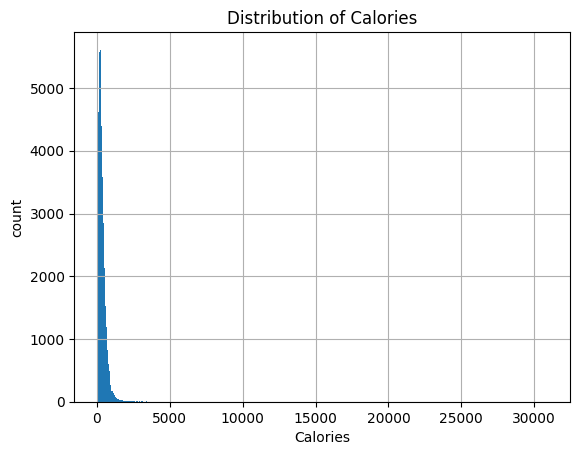

In [75]:
recipes_df['Calories'].hist(bins=500)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('count')

The figure is skewed quite a lot! We take the threshold of 2000 and plot again.

In [76]:
recipes_df = recipes_df[recipes_df['Calories']<2000]

Text(0, 0.5, 'count')

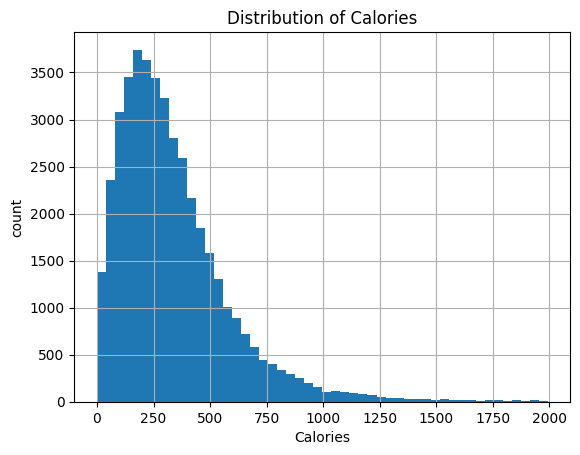

In [77]:
recipes_df['Calories'].hist(bins=50)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('count')

Much better! But it is still skewed. We can continue and do further processing if the model performs not well.

Text(0, 0.5, 'count')

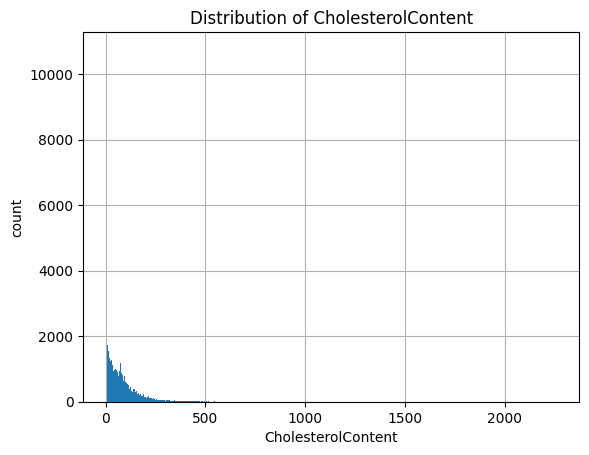

In [78]:
recipes_df['CholesterolContent'].hist(bins=500)
plt.title('Distribution of CholesterolContent')
plt.xlabel('CholesterolContent')
plt.ylabel('count')

In [79]:
recipes_df = recipes_df[recipes_df['CholesterolContent']<300]

Text(0, 0.5, 'count')

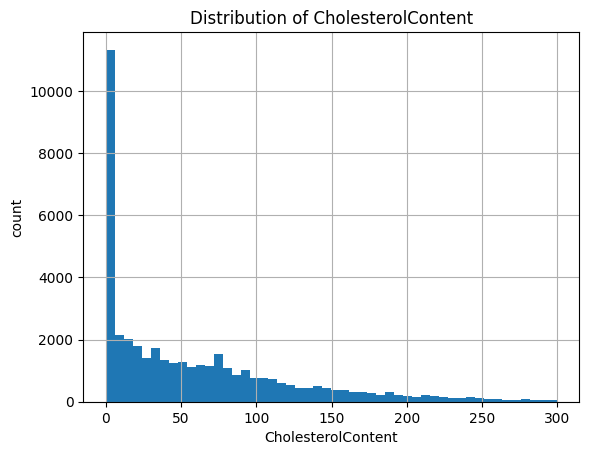

In [80]:
recipes_df['CholesterolContent'].hist(bins=50)
plt.title('Distribution of CholesterolContent')
plt.xlabel('CholesterolContent')
plt.ylabel('count')

And continue. Same for other features.

Text(0, 0.5, 'count')

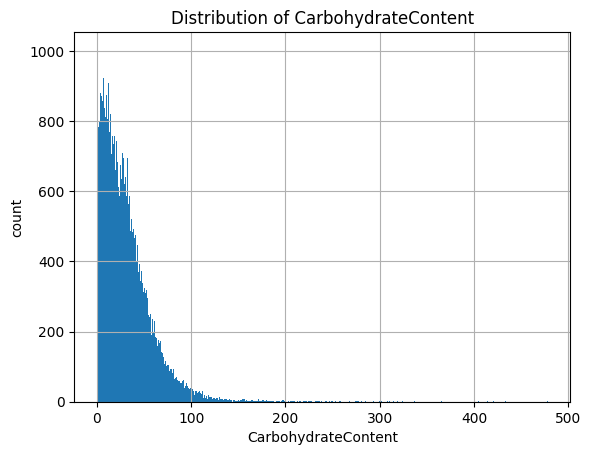

In [81]:
recipes_df['CarbohydrateContent'].hist(bins=500)
plt.title('Distribution of CarbohydrateContent')
plt.xlabel('CarbohydrateContent')
plt.ylabel('count')

In [82]:
recipes_df = recipes_df[recipes_df['CarbohydrateContent']<200]

Text(0, 0.5, 'count')

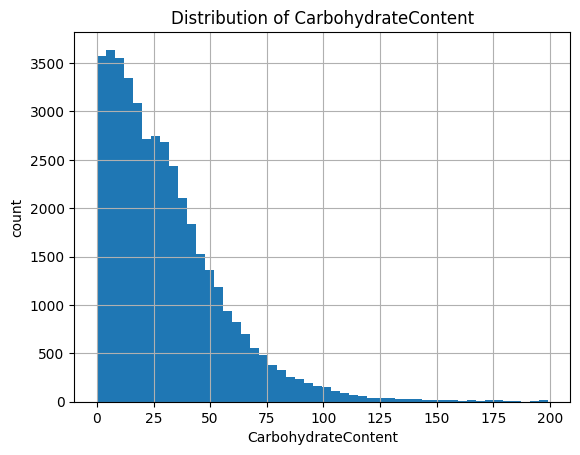

In [83]:
recipes_df['CarbohydrateContent'].hist(bins=50)
plt.title('Distribution of CarbohydrateContent')
plt.xlabel('CarbohydrateContent')
plt.ylabel('count')

Text(0, 0.5, 'count')

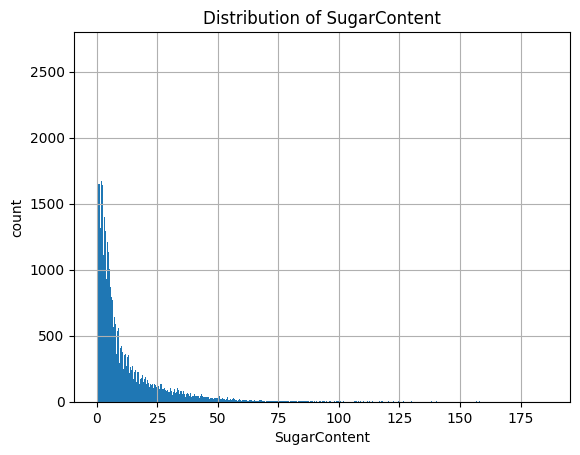

In [84]:
recipes_df['SugarContent'].hist(bins=500)
plt.title('Distribution of SugarContent')
plt.xlabel('SugarContent')
plt.ylabel('count')

In [85]:
recipes_df = recipes_df[recipes_df['SugarContent'] < 80]

Text(0, 0.5, 'count')

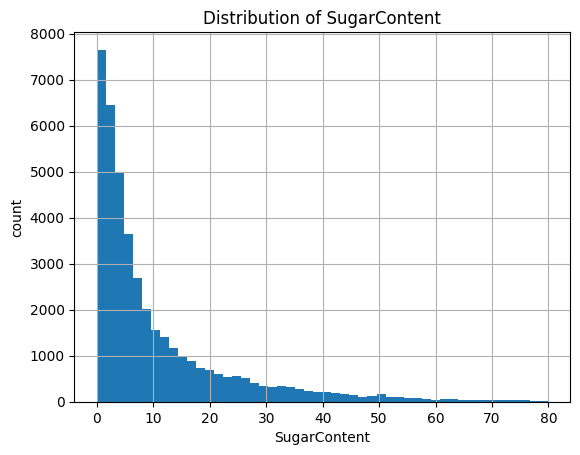

In [86]:
recipes_df['SugarContent'].hist(bins=50)
plt.title('Distribution of SugarContent')
plt.xlabel('SugarContent')
plt.ylabel('count')

Text(0, 0.5, 'count')

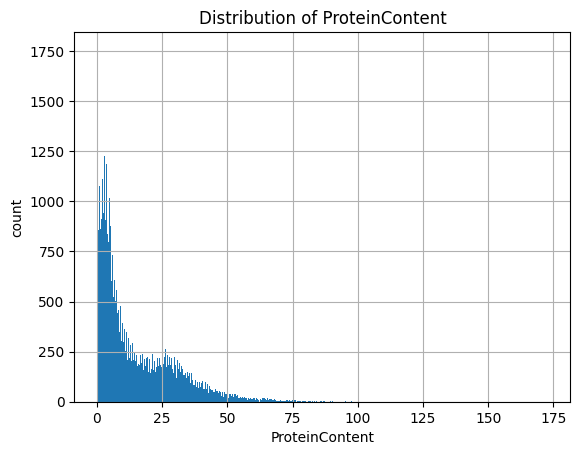

In [87]:
recipes_df['ProteinContent'].hist(bins=500)
plt.title('Distribution of ProteinContent')
plt.xlabel('ProteinContent')
plt.ylabel('count')

In [88]:
recipes_df = recipes_df[recipes_df['ProteinContent'] < 100]

Text(0, 0.5, 'count')

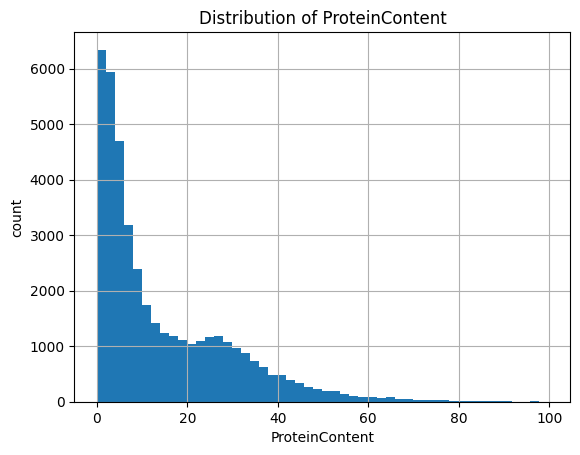

In [89]:
recipes_df['ProteinContent'].hist(bins=50)
plt.title('Distribution of ProteinContent')
plt.xlabel('ProteinContent')
plt.ylabel('count')

In [90]:
recipes_df.shape

(41478, 10)

In [91]:
# Split the dataset as stated before
meal = ['Dessert', 'Lunch/Snacks', 'One Dish Meal', 'Breakfast', 'Beverages']
ingredient = ['Vegetable', 'Chicken', 'Chicken Breast', 'Pork', 'Meat', 'Potato']
recipes_meal_df = recipes_df[recipes_df['RecipeCategory'].isin(meal)]
recipes_ingre_df = recipes_df[recipes_df['RecipeCategory'].isin(ingredient)]

In [92]:
recipes_df.loc[~recipes_df['RecipeCategory'].isin(set(meal) | set(ingredient)), 'RecipeCategory'] = 'Others'
recipes_others_df = recipes_df[recipes_df['RecipeCategory'] == 'Others']

Text(0.5, 1.0, 'Distribution of RecipeCategories')

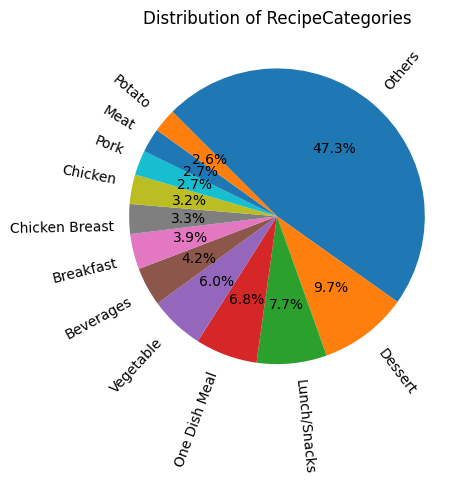

In [93]:
sorted_counts = recipes_df['RecipeCategory'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 135, counterclock = False, autopct='%1.1f%%', rotatelabels = True)
plt.title('Distribution of RecipeCategories')

From the pie chart, we see the top 11 categories only make up 52.7%，which means only 52.7% of the whole dataset can be predicted with RecipeCategory information. Also, in the 11 chosen categories, meals have a much higher proportion, with dessert, lunch/snack and one dish meal being top 3.

In [94]:
# make all categories
all_categories = list(set(meal) | set(ingredient))
all_categories.append('Others')

all_categories_proportion = []
for dish in all_categories:
    num_high_score = len(recipes_df[(recipes_df['RecipeCategory'] == dish) & (recipes_df['HighScore'] == 1)])
    num_all = len(recipes_df[recipes_df['RecipeCategory'] == dish])
    all_categories_proportion.append(num_high_score / num_all)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Chicken'),
  Text(1, 0, 'Lunch/Snacks'),
  Text(2, 0, 'Pork'),
  Text(3, 0, 'One Dish Meal'),
  Text(4, 0, 'Dessert'),
  Text(5, 0, 'Meat'),
  Text(6, 0, 'Chicken Breast'),
  Text(7, 0, 'Breakfast'),
  Text(8, 0, 'Potato'),
  Text(9, 0, 'Vegetable'),
  Text(10, 0, 'Beverages'),
  Text(11, 0, 'Others')])

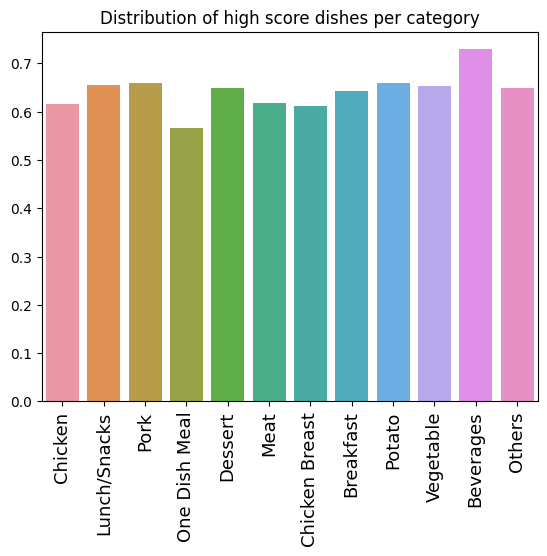

In [95]:
ax = sns.barplot(x=all_categories, y=all_categories_proportion)
plt.title('Distribution of high score dishes per category')
plt.xticks(rotation=90, size=13)

From the figure, we can clearly see that the dataset is unbiased: For every category, except for "one dish meal", the proportion of high score dishes is above 60%, and the proportion of beverages even reaches 70%. Although the proportion for "one dish meal" does not reach 60%, it is above 55%. We must take this unbiasedness into account.

## Summary of Data Visualization

Some interesting insights were found in the data visualization:

1. The top 11 categories only make up for 52.7% of all the dataset.
2. For many features, the value is more distributed in a small region, while about 0.1% of all the values are extremely big.
3. The dataset is unbiased. We see more high score dishes. (We should delete some positive examples so that positive and negative examples are of the same amount)

With these in mind, we can be more sure to continue with model fitting.

## Start of Model Fitting and Model Evaluation

In our task, we want to predict whether a new dish will be popular. Hence, we only have two options in total: popular and not popular, which means this task is a classification task. To be more precise, this task is a binary classification problem.

One typical machine learning model for that is logistic regression. Since we also want to see the influence of each column, we use logistic regression with L1 regularization as baseline. To compare, we also build a deep learning model (with neural network) to do the classification. The model fitting and evaluation are as follows:

In [96]:
def specificity_score(predictions, ground_truth):
    tn, fp = 0.0, 0.0
    for l,m in enumerate(ground_truth):
        if m==predictions[l] and m==0:
            tn+=1
        if m!=predictions[l] and m==0:
            fp+=1
    return tn/(tn+fp)

In [97]:
# Check the number of negative examples
recipes_orig_df = recipes_df
#recipes_meal_df.value_counts('HighScore')
#recipes_ingre_df.value_counts('HighScore')
#recipes_others_df.value_counts('HighScore')
#recipes_orig_df.value_counts('HighScore')

In [98]:
from sklearn.utils import shuffle
ones_subset = recipes_meal_df.loc[recipes_meal_df["HighScore"] == 1, :]
zeros_subset = recipes_meal_df.loc[recipes_meal_df["HighScore"] == 0, :]
sampled_ones = ones_subset.sample(4774, random_state = 22)
clean_meal_df = pd.concat([zeros_subset, sampled_ones], ignore_index=True)
clean_meal_df = shuffle(clean_meal_df, random_state = 39)

In [99]:
ones_subset = recipes_ingre_df.loc[recipes_ingre_df["HighScore"] == 1, :]
zeros_subset = recipes_ingre_df.loc[recipes_ingre_df["HighScore"] == 0, :]
sampled_ones = ones_subset.sample(3064, random_state = 22)
clean_ingre_df = pd.concat([zeros_subset, sampled_ones], ignore_index=True)
clean_ingre_df = shuffle(clean_ingre_df, random_state = 39)

In [100]:
ones_subset = recipes_others_df.loc[recipes_others_df["HighScore"] == 1, :]
zeros_subset = recipes_others_df.loc[recipes_others_df["HighScore"] == 0, :]
sampled_ones = ones_subset.sample(6906, random_state = 22)
clean_others_df = pd.concat([zeros_subset, sampled_ones], ignore_index=True)
clean_others_df = shuffle(clean_others_df, random_state = 39)

In [101]:
ones_subset = recipes_orig_df.loc[recipes_orig_df["HighScore"] == 1, :]
zeros_subset = recipes_orig_df.loc[recipes_orig_df["HighScore"] == 0, :]
sampled_ones = ones_subset.sample(14744, random_state = 22)
clean_orig_df = pd.concat([zeros_subset, sampled_ones], ignore_index=True)
clean_orig_df = shuffle(clean_orig_df, random_state = 39)

In [102]:
# Check if all the datasets are balanced
#clean_meal_df.value_counts('HighScore')
#clean_ingre_df.value_counts('HighScore')
#clean_others_df.value_counts('HighScore')
clean_orig_df.value_counts('HighScore')

HighScore
0.0    14744
1.0    14744
dtype: int64

Good! All datasets are no longer biased.

Prepare for 3 split dataset.

In [103]:
# Prepare the dummy dataframe (process categorical entries) for 3 datasets
# In order that the name is not too long, we use 1, 2 and 3 to indicate df
# 1: meal, 2: ingredients, 3: others
recipes_dummies_1 = pd.get_dummies(clean_meal_df, drop_first = True, columns = ['RecipeCategory'])
recipes_dummies_2 = pd.get_dummies(clean_ingre_df, drop_first = True, columns = ['RecipeCategory'])
recipes_dummies_3 = pd.get_dummies(clean_others_df, columns = ['RecipeCategory'])

# Prepare the training and test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Copied from the first part
X_1 = recipes_dummies_1.drop(["RecipeId", "Name", "HighScore"], axis=1)
y_1 = recipes_dummies_1["HighScore"]
X_2 = recipes_dummies_2.drop(["RecipeId", "Name", "HighScore"], axis=1)
y_2 = recipes_dummies_2["HighScore"]
X_3 = recipes_dummies_3.drop(["RecipeId", "Name", "HighScore"], axis=1)
y_3 = recipes_dummies_3["HighScore"]

# Split into training and test sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42, stratify= y_1)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42, stratify= y_2)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42, stratify= y_3)

# Scale the data
scaler = StandardScaler()
X_train_scaled_1 = scaler.fit_transform(X_train_1)
X_test_scaled_1 = scaler.transform(X_test_1)
X_train_scaled_2 = scaler.fit_transform(X_train_2)
X_test_scaled_2 = scaler.transform(X_test_2)
X_train_scaled_3 = scaler.fit_transform(X_train_3)
X_test_scaled_3 = scaler.transform(X_test_3)

Baseline: Logistic regression

In [104]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg_1 = LogisticRegression(penalty = 'l1', solver = 'saga')
logreg_2 = LogisticRegression(penalty = 'l1', solver = 'saga')
logreg_3 = LogisticRegression(penalty = 'l1', solver = 'saga')

In [105]:
# Fit the model
logreg_1.fit(X_train_scaled_1, y_train_1)
logreg_2.fit(X_train_scaled_2, y_train_2)
logreg_3.fit(X_train_scaled_3, y_train_3)

# Predict probabilities, this only uses predicted value=1
y_pred_probs_1 = logreg_1.predict_proba(X_test_scaled_1)[:, 1]
y_pred_probs_2 = logreg_2.predict_proba(X_test_scaled_2)[:, 1]
y_pred_probs_3 = logreg_3.predict_proba(X_test_scaled_3)[:, 1]

We can draw ROC curve here to see the model performance. The bigger the area under the blue line is, the better the model performs.

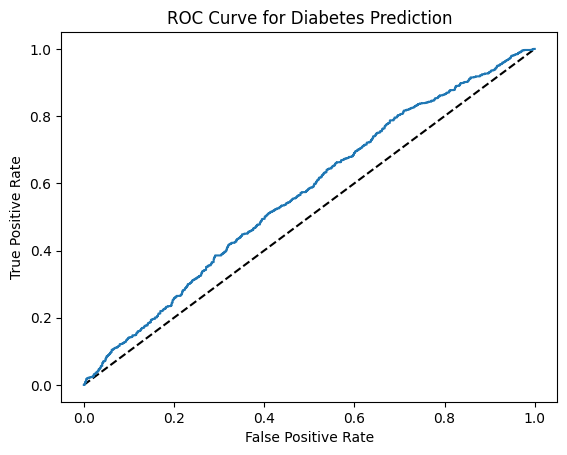

In [106]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_1, y_pred_probs_1)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

In order to better compare the models, we use accuracy, precision and specificity score.

In [107]:
for i in range(len(y_pred_probs_1)):
    if y_pred_probs_1[i] >=0.5:
        y_pred_probs_1[i] = 1
    else:
        y_pred_probs_1[i] = 0
        
for i in range(len(y_pred_probs_2)):
    if y_pred_probs_2[i] >=0.5:
        y_pred_probs_2[i] = 1
    else:
        y_pred_probs_2[i] = 0
        
for i in range(len(y_pred_probs_3)):
    if y_pred_probs_3[i] >=0.5:
        y_pred_probs_3[i] = 1
    else:
        y_pred_probs_3[i] = 0

In [108]:
from sklearn.metrics import accuracy_score, precision_score

# meal
print('split:', 1)
print('accuracy:', accuracy_score(y_pred_probs_1, y_test_1))
print('precision:', precision_score(y_pred_probs_1, y_test_1))
print('specificity:', specificity_score(y_pred_probs_1, y_test_1.values))

# ingredients
print('split:', 2)
print('accuracy:', accuracy_score(y_pred_probs_2, y_test_2))
print('precision:', precision_score(y_pred_probs_2, y_test_2))
print('specificity:', specificity_score(y_pred_probs_2, y_test_2.values))

# others
print('split:', 3)
print('accuracy:', accuracy_score(y_pred_probs_3, y_test_3))
print('precision:', precision_score(y_pred_probs_3, y_test_3))
print('specificity:', specificity_score(y_pred_probs_3, y_test_3.values))

split: 1
accuracy: 0.5476439790575917
precision: 0.5256544502617801
specificity: 0.5696335078534032
split: 2
accuracy: 0.5579119086460033
precision: 0.5562805872756933
specificity: 0.5595432300163132
split: 3
accuracy: 0.5544697792254796
precision: 0.6097031136857349
specificity: 0.4992764109985528


Here, we try thecomparison model. (NN)

In [109]:
from tensorflow import keras
from tensorflow.keras import layers

model_1 = keras.Sequential([
    layers.Dense(6, activation='relu', input_shape=[10]),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

model_2 = keras.Sequential([
    layers.Dense(6, activation='relu', input_shape=[11]),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

model_3 = keras.Sequential([
    layers.Dense(6, activation='relu', input_shape=[7]),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

In [110]:
model_1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

model_2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

model_3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [111]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=30,
    min_delta=0.001,
    restore_best_weights=True,
)

history_1 = model_1.fit(
    X_train_scaled_1, y_train_1,
    validation_data=(X_test_scaled_1, y_test_1),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0    # hide the output because we have so many epochs
)

history_2 = model_2.fit(
    X_train_scaled_2, y_train_2,
    validation_data=(X_test_scaled_2, y_test_2),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0
)

history_3 = model_3.fit(
    X_train_scaled_3, y_train_3,
    validation_data=(X_test_scaled_3, y_test_3),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0
)

In [112]:
y_pred_nn_1 = model_1.predict(X_test_scaled_1)
y_pred_nn_2 = model_2.predict(X_test_scaled_2)
y_pred_nn_3 = model_3.predict(X_test_scaled_3)

for i in range(len(y_pred_nn_1)):
    if y_pred_nn_1[i] >=0.5:
        y_pred_nn_1[i] = 1
    else:
        y_pred_nn_1[i] = 0
        
for i in range(len(y_pred_nn_2)):
    if y_pred_nn_2[i] >=0.5:
        y_pred_nn_2[i] = 1
    else:
        y_pred_nn_2[i] = 0
        
for i in range(len(y_pred_nn_3)):
    if y_pred_nn_3[i] >=0.5:
        y_pred_nn_3[i] = 1
    else:
        y_pred_nn_3[i] = 0
        
# meal
print('split:', 1)
print('accuracy:', accuracy_score(y_pred_nn_1, y_test_1))
print('precision:', precision_score(y_pred_nn_1, y_test_1))
print('specificity:', specificity_score(y_pred_nn_1, y_test_1.values))

# ingredients
print('split:', 2)
print('accuracy:', accuracy_score(y_pred_nn_2, y_test_2))
print('precision:', precision_score(y_pred_nn_2, y_test_2))
print('specificity:', specificity_score(y_pred_nn_2, y_test_2.values))

# others
print('split:', 3)
print('accuracy:', accuracy_score(y_pred_nn_3, y_test_3))
print('precision:', precision_score(y_pred_nn_3, y_test_3))
print('specificity:', specificity_score(y_pred_nn_3, y_test_3.values))

87/87 [==============================] - 0s 777us/step
split: 1
accuracy: 0.5340314136125655
precision: 0.8356020942408376
specificity: 0.2324607329842932
split: 2
accuracy: 0.5122349102773246
precision: 0.49592169657422513
specificity: 0.5285481239804242
split: 3
accuracy: 0.5414404632645675
precision: 0.6191165821868212
specificity: 0.4638205499276411


Visualize one of the models to see if the model is trained properly.

Best Validation Loss: 0.6851
Best Validation Accuracy: 0.5377


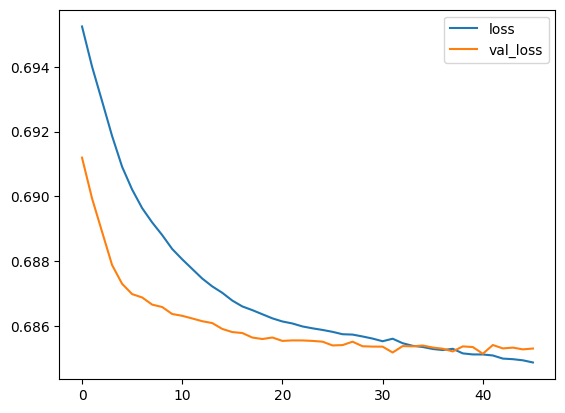

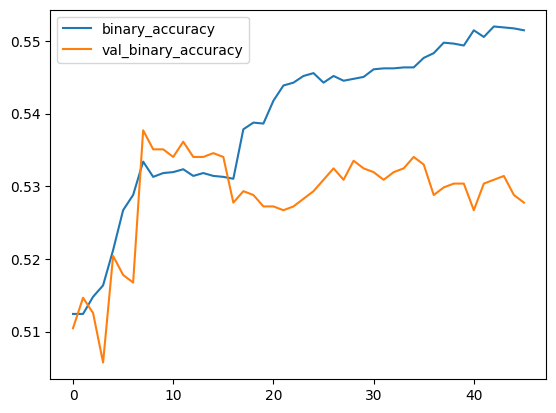

In [113]:
history_df_1 = pd.DataFrame(history_1.history)
# Start the plot at epoch 5
history_df_1.loc[:, ['loss', 'val_loss']].plot()
history_df_1.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df_1['val_loss'].min(), 
              history_df_1['val_binary_accuracy'].max()))

Unfortunately, the model performance is not as good as we expected. There are two possibilities that can lead to this: Either our model ability is weak, or there is no clear relationship between data and popularity of the dishes. Below, we try many different machine learning models and see their performance to check if we are facing the data issue.

In [114]:
models = {}

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [115]:
# We use split 1 as an example, as it performed the best in our existing two models.

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall, specificity = {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train_scaled_1, y_train_1)
    
    # Make predictions
    predictions = models[key].predict(X_test_scaled_1)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test_1)
    precision[key] = precision_score(predictions, y_test_1)
    recall[key] = recall_score(predictions, y_test_1)
    specificity[key] = specificity_score(predictions, y_test_1.values)

In [116]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Specificity'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Specificity'] = specificity.values()

df_model

,Accuracy,Precision,Specificity
Support Vector Machines,0.550262,0.525654,0.574869
Decision Trees,0.499476,0.505759,0.493194
Random Forest,0.543455,0.521466,0.565445
Naive Bayes,0.524607,0.648168,0.401047
K-Nearest Neighbor,0.507330,0.490052,0.524607


Seems that all other models do not perform well either. Therefore, we think it is very probable that our data does not represent popularity well. We may need to collect more features to predict popularity.

Also, it is quite interesting to notice that naive Bayes model, similar to NN model split 1 and 3, have a tendency to correctly classify many recipes in one class while few in the other. This results in an accuracy score of about 0.5. Therefore, we have to take a comprehensive look at every aspects of evaluation.

## Comparision to the business success criteria

In this task, our business success criteria is to reach 75% accuracy for all low scoring recipes. 

Before comparing, we have to point out that only evaluating low scoring recipes is not a good evaluation for our task. It is only meaningful when we have both evaluation for low and high scoring recipes.

Back in the data processing part, we deleted some data points which have extremely high values. In this part, we should add them into the test set.

In [117]:
recipes_full_df = pd.read_csv('data/recipes.csv')
recipes_full_df = recipes_full_df.dropna()

In [118]:
# First concat the extra dataset to the original test set, then get dummies and scale
recipes_full_df['data_source'] = ['not_set']*recipes_full_df.shape[0]

recipes_full_df.loc[recipes_df.index, 'data_source'] = 'exits'

extra_data_df = recipes_full_df[(recipes_full_df['data_source'] == 'not_set') & (recipes_full_df['HighScore'] == 0)]
extra_data_df_1 = extra_data_df[extra_data_df['RecipeCategory'].isin(meal)]
extra_data_df_2 = extra_data_df[extra_data_df['RecipeCategory'].isin(ingredient)]
extra_data_df_3 = extra_data_df[extra_data_df['RecipeCategory'] == 'Others']

full_data_df_1 = pd.concat([clean_meal_df, extra_data_df_1])
full_data_df_2 = pd.concat([clean_ingre_df, extra_data_df_2])
full_data_df_3 = pd.concat([clean_others_df, extra_data_df_3])

full_dummies_1 = pd.get_dummies(full_data_df_1, drop_first = True, columns = ['RecipeCategory'])
full_dummies_2 = pd.get_dummies(full_data_df_2, drop_first = True, columns = ['RecipeCategory'])
full_dummies_3 = pd.get_dummies(full_data_df_3, columns = ['RecipeCategory'])

full_dummies_X_1 = full_dummies_1.drop(["RecipeId", "Name", "HighScore", "data_source"], axis=1)
full_dummies_y_1 = full_dummies_1["HighScore"]
full_dummies_X_2 = full_dummies_2.drop(["RecipeId", "Name", "HighScore", "data_source"], axis=1)
full_dummies_y_2 = full_dummies_2["HighScore"]
full_dummies_X_3 = full_dummies_3.drop(["RecipeId", "Name", "HighScore", "data_source"], axis=1)
full_dummies_y_3 = full_dummies_3["HighScore"]

full_dummies_scaled_X_1 = scaler.fit_transform(full_dummies_X_1)
full_dummies_scaled_X_2 = scaler.fit_transform(full_dummies_X_2)
full_dummies_scaled_X_3 = scaler.fit_transform(full_dummies_X_3)

We use our better performing model: Logistic regression to do the test.

In [119]:
# Predict probabilities, this only uses predicted value=1
y_pred_probs_1 = logreg_1.predict_proba(full_dummies_scaled_X_1)[:, 1]
y_pred_probs_2 = logreg_2.predict_proba(full_dummies_scaled_X_2)[:, 1]
y_pred_probs_3 = logreg_3.predict_proba(full_dummies_scaled_X_3)[:, 1]

In [120]:
for i in range(len(y_pred_probs_1)):
    if y_pred_probs_1[i] >=0.5:
        y_pred_probs_1[i] = 1
    else:
        y_pred_probs_1[i] = 0
        
for i in range(len(y_pred_probs_2)):
    if y_pred_probs_2[i] >=0.5:
        y_pred_probs_2[i] = 1
    else:
        y_pred_probs_2[i] = 0
        
for i in range(len(y_pred_probs_3)):
    if y_pred_probs_3[i] >=0.5:
        y_pred_probs_3[i] = 1
    else:
        y_pred_probs_3[i] = 0

In [121]:
# meal
print('split:', 1)
print('accuracy:', accuracy_score(y_pred_probs_1, full_dummies_y_1))
print('precision:', precision_score(y_pred_probs_1, full_dummies_y_1))
print('specificity:', specificity_score(y_pred_probs_1, full_dummies_y_1.values))

# ingredients
print('split:', 2)
print('accuracy:', accuracy_score(y_pred_probs_2, full_dummies_y_2))
print('precision:', precision_score(y_pred_probs_2, full_dummies_y_2))
print('specificity:', specificity_score(y_pred_probs_2, full_dummies_y_2.values))

# others
print('split:', 3)
print('accuracy:', accuracy_score(y_pred_probs_3, full_dummies_y_3))
print('precision:', precision_score(y_pred_probs_3, full_dummies_y_3))
print('specificity:', specificity_score(y_pred_probs_3, full_dummies_y_3.values))

split: 1
accuracy: 0.5538068472151252
precision: 0.5540427314620863
specificity: 0.5535821193374576
split: 2
accuracy: 0.5294402322955315
precision: 0.5476501305483029
specificity: 0.5116427432216906
split: 3
accuracy: 0.5281639154358528
precision: 0.5884737909064581
specificity: 0.4678540399652476


For the accuracy of low scoring recipes, we focus on the specificity score. Unfortunately, our model performance is below the business success criteria.

## Final summary of the project

In this project report, we finished the data validation, visualization and processing. To fit the model to predict whether a dish would be popular, we came up with a baseline model logistic regression and a comparison model neural network. Then, we evaluated them with different metrics.

In this project, we found some possible problems of the dataset, which is also something we should do in the future in business:

1. We should discuss with Tasty Bytes about more of their model performance. In this task description, we only know their model performance about low scoring recipes, which is incomplete to evaluate the model. That is because a model can be very good at predicting one class while poor at the other.
2. We should ask Tasty Bytes for more information about each recipes to make better predictions. Currently, we use all the information we have, but the accuracy was not high. It is possible that the given information is not quite relevant to popularity. It might be some other factors, for example, whether the dish is tasty, or who made the dishes, that can influence the popularity the most. Hence, we believe more information about the recipe would definately help us with predicting.
3. (For intern use and not present to Tasty Bytes) It would be beneficial if we have better computation resource. I tried to analyze the name of recipes with NLP techniques but the DataCamp Workspace cannot take a relatively big model. Of course, it might still fail even if we add the name information, but it definately worths a try.